In [1]:
import pyforest
import scipy.stats as st

#### 1. Read the data set, clean the data and prepare a final dataset to be used for analysis.

In [2]:
df=pd.read_csv("Basketball.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


#### Let us find the shape of the data.

In [4]:
df.shape

(61, 13)

In [5]:
df.dtypes

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

Looking into the data types of the variables we can see that the columns like Score, Played games etc. have either float/integer values in the dataset but here its mentioned as object. Thus, we'll change these data types accordingly.

In [6]:
df[['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion','Runner-up']] = df[['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion','Runner-up']].apply(pd.to_numeric,errors='coerce')

<IPython.core.display.Javascript object>

In [7]:
df.dtypes

Team                    object
Tournament               int64
Score                  float64
PlayedGames            float64
WonGames               float64
DrawnGames             float64
LostGames              float64
BasketScored           float64
BasketGiven            float64
TournamentChampion     float64
Runner-up              float64
TeamLaunch              object
HighestPositionHeld      int64
dtype: object

#### Lets check the presence of null values in the dataset.

In [8]:
df.isnull().sum() 

Team                    0
Tournament              0
Score                   1
PlayedGames             1
WonGames                1
DrawnGames              1
LostGames               1
BasketScored            1
BasketGiven             1
TournamentChampion     52
Runner-up              48
TeamLaunch              0
HighestPositionHeld     0
dtype: int64

From the above output, columns like Tournament Champion, runner-up have huge number of null values.

In [9]:
df.replace(np.nan, 0, inplace=True)

<IPython.core.display.Javascript object>

Replacing null values with 0 for ease of calculations and readability since most of the columns present are numerical.

In [10]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

So, we can see now there isnt any null values present in any columns.

#### To check the presence of duplicate values:

In [11]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Team, Tournament, Score, PlayedGames, WonGames, DrawnGames, LostGames, BasketScored, BasketGiven, TournamentChampion, Runner-up, TeamLaunch, HighestPositionHeld]
Index: []


The empty Dataframe denotes there are no duplicate values.

#### By looking into column wise, we can see that TeamLaunch isnt proper, its also accompanied by some garbage values. So, we can delete that.

In [12]:
df['TeamLaunch']

0         1929
1         1929
2         1929
3     1931to32
4         1929
        ...   
56     2009-10
57     1956-57
58     1951~52
59     1955-56
60     2017~18
Name: TeamLaunch, Length: 61, dtype: object

In [13]:
df['TeamLaunch']= df['TeamLaunch'].apply(lambda x: x[0:4])
df['TeamLaunch'] #keeping initial year as the origin year

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: TeamLaunch, Length: 61, dtype: object

In [14]:
df.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,20.000000


#### 2. Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data. Hint: Use statistical techniques and visualization techniques to come up with useful metrics and reporting. Find out the best performing team, oldest team, team with highest goals, team with lowest performance etc. and many more.

### Best performing teams

In [15]:
df.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1


In [16]:
df_sorted=df.sort_values('WonGames', ascending=False)
df_sorted

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34.0,38.0,8.0,10.0,20.0,38.0,66.0,0.0,0.0,2009,20
57,Team 58,1,22.0,30.0,7.0,8.0,15.0,37.0,57.0,0.0,0.0,1956,16
58,Team 59,1,19.0,30.0,7.0,5.0,18.0,51.0,85.0,0.0,0.0,1951,16
59,Team 60,1,14.0,30.0,5.0,4.0,21.0,34.0,65.0,0.0,0.0,1955,15


In [17]:
df_winnings= df.nlargest(20, ['WonGames'])
df_winnings

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1
6,Team 7,82,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,0.0,0.0,1929,3
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1
8,Team 9,58,2109.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,0.0,1.0,1939,2
9,Team 10,51,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,0.0,1932,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

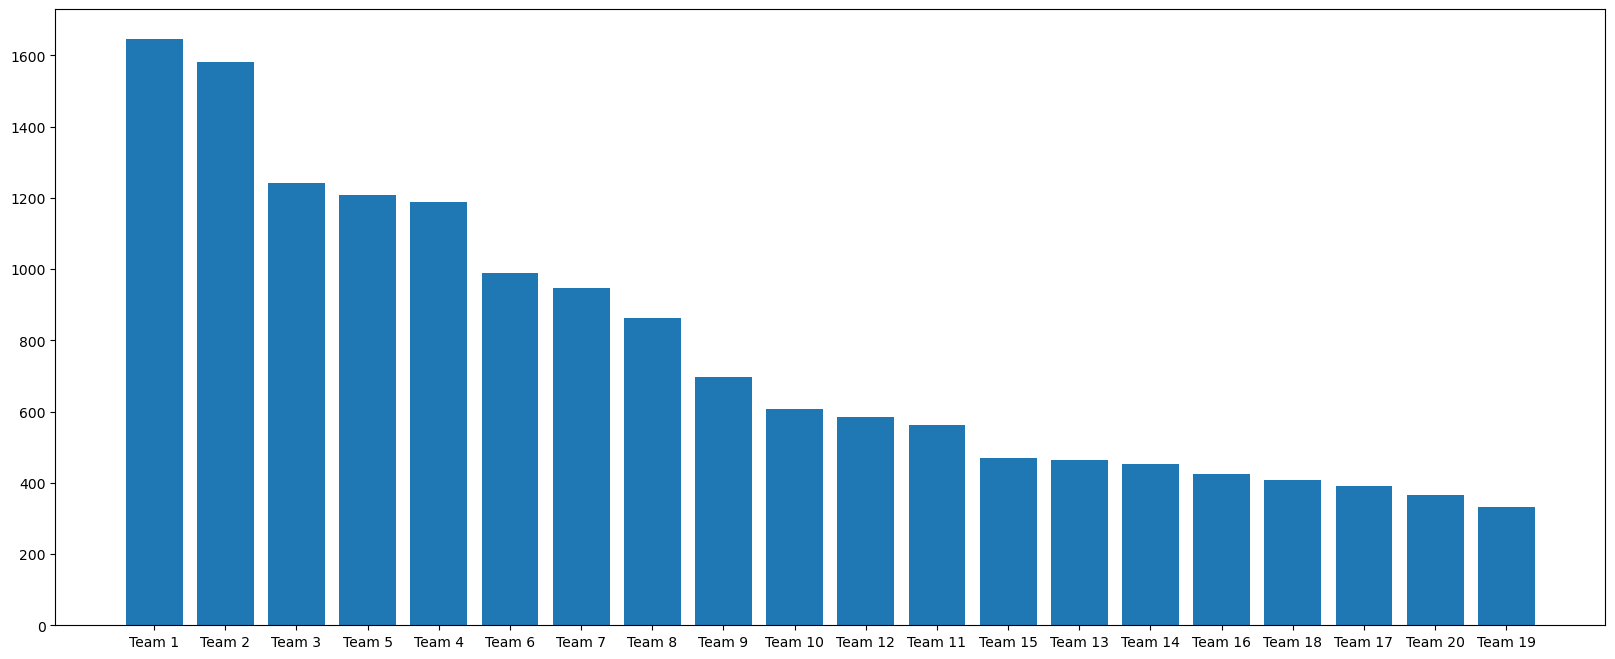

In [18]:
plt.figure(figsize=(20,8))
plt.bar(x=df_winnings['Team'], height= df_winnings['WonGames'])
plt.show()

Most win the team won is team 1.

### Teams who have been tournament champions for the max number of times

In [19]:
#Top three teams which has won the Tournament as a champions for highest number of times. 
df_champions= df.nlargest(10, ['TournamentChampion']) 
df_champions

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1
4,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1
3,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1
9,Team 10,51,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,0.0,1932,1
10,Team 11,45,1814.0,1530.0,563.0,392.0,575.0,2052.0,2188.0,1.0,5.0,1941,1
6,Team 7,82,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,0.0,0.0,1929,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='TournamentChampion'>

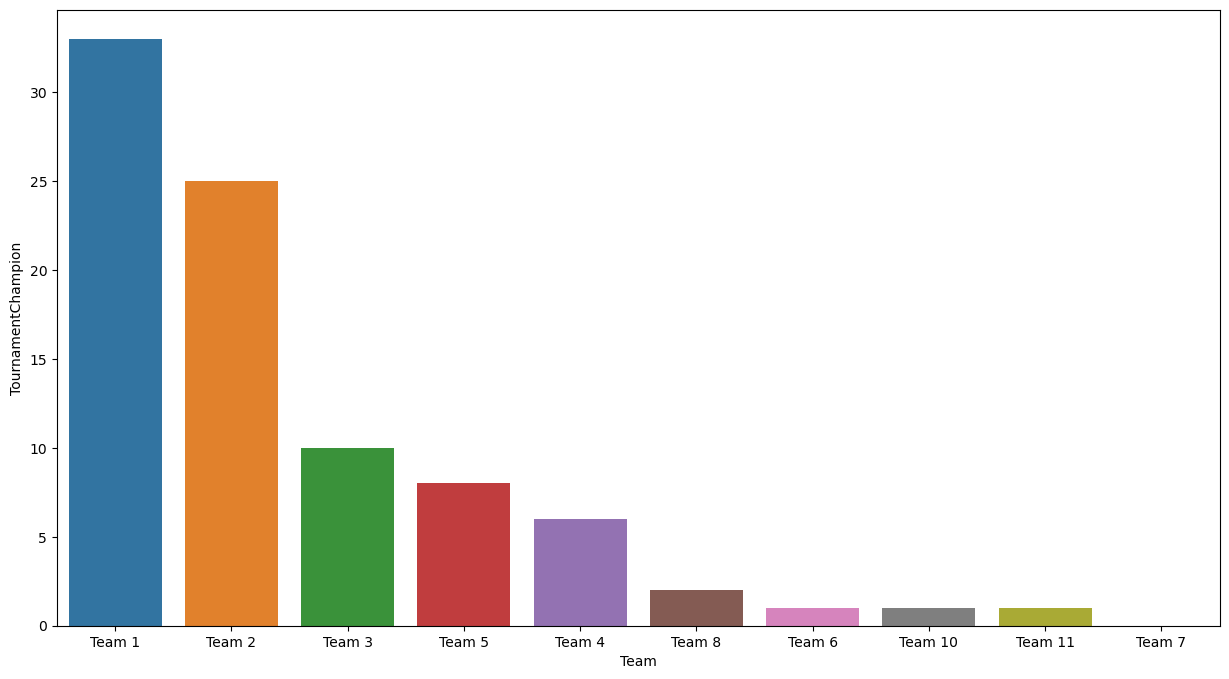

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(df_champions,x=df_champions['Team'],y=df_champions['TournamentChampion'])

Among top 10 teams, Team 1 has won the most championships. Team 7 being the least.

### Teams with highest win%

In [21]:
df.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1


In [24]:
df['Win%'] = (df['WonGames']/df['PlayedGames'])*100
df['Win%']

0     59.630702
1     57.241130
2     47.475134
3     44.557057
4     43.772629
        ...    
56    21.052632
57    23.333333
58    23.333333
59    16.666667
60          NaN
Name: Win%, Length: 61, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='TournamentChampion'>

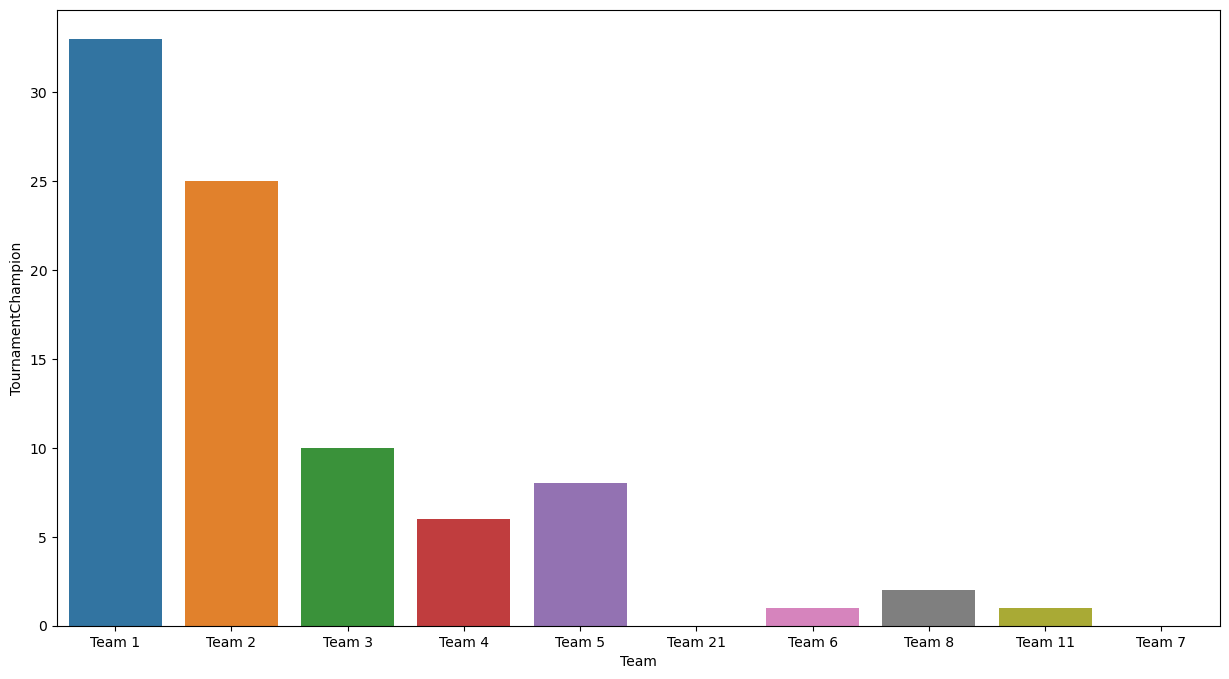

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(data = df.nlargest(10, 'Win%'), x='Team', y='TournamentChampion')

### Teams with lowest performance

In [26]:
df['Lose%'] = (df['LostGames']/df['PlayedGames'])*100
df['Lose%']

0     20.383780
1     22.013034
2     29.648049
3     32.319820
4     33.309196
        ...    
56    52.631579
57    50.000000
58    60.000000
59    70.000000
60          NaN
Name: Lose%, Length: 61, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='LostGames'>

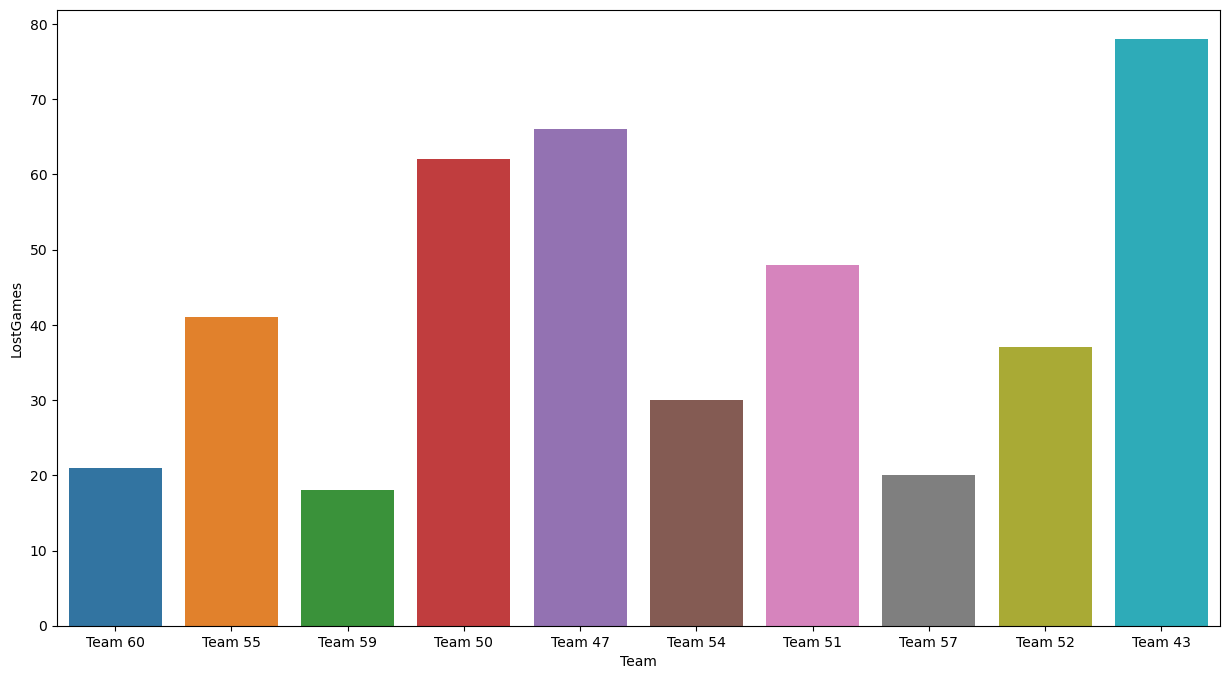

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(data = df.nlargest(10, 'Lose%'), x='Team', y='LostGames')

### From the top 20 teams with highest scores, highest matches won, we'll combine it with teams having highest winning % 

In [28]:
df_winpercent = df.nlargest(20, 'Win%')

In [29]:
df_winpercent['TeamLaunch']=df_winpercent['TeamLaunch'].apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

In [30]:
df_winnings['TeamLaunch']=df_winnings['TeamLaunch'].apply(pd.to_numeric, errors='coerce')

<IPython.core.display.Javascript object>

In [31]:
df_intersect= pd.merge(df_winnings, df_winpercent, how='inner')
df_intersect

<IPython.core.display.Javascript object>

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Won,Win%,Lose%
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1,59.630702,59.630702,20.383780
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1,57.241130,57.241130,22.013034
2,Team 3,80,3442.0,2614.0,1241.0,598.0,775.0,4534.0,3309.0,10.0,8.0,1929,1,47.475134,47.475134,29.648049
3,Team 5,86,3368.0,2762.0,1209.0,633.0,920.0,4631.0,3700.0,8.0,7.0,1929,1,43.772629,43.772629,33.309196
4,Team 4,82,3386.0,2664.0,1187.0,616.0,861.0,4398.0,3469.0,6.0,6.0,1931,1,44.557057,44.557057,32.319820
5,Team 6,73,2819.0,2408.0,990.0,531.0,887.0,3680.0,3373.0,1.0,4.0,1934,1,41.112957,41.112957,36.835548
6,Team 7,82,2792.0,2626.0,948.0,608.0,1070.0,3609.0,3889.0,0.0,0.0,1929,3,36.100533,36.100533,40.746382
7,Team 8,70,2573.0,2302.0,864.0,577.0,861.0,3228.0,3230.0,2.0,3.0,1929,1,37.532580,37.532580,37.402259
8,Team 9,58,2109.0,1986.0,698.0,522.0,766.0,2683.0,2847.0,0.0,1.0,1939,2,35.146022,35.146022,38.569990
9,Team 10,51,1884.0,1728.0,606.0,440.0,682.0,2159.0,2492.0,1.0,0.0,1932,1,35.069444,35.069444,39.467593


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\arvsr\AppData\Local\Temp\ipykernel_39684\1686196749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_intersect.corr(),annot=True)


<Axes: >

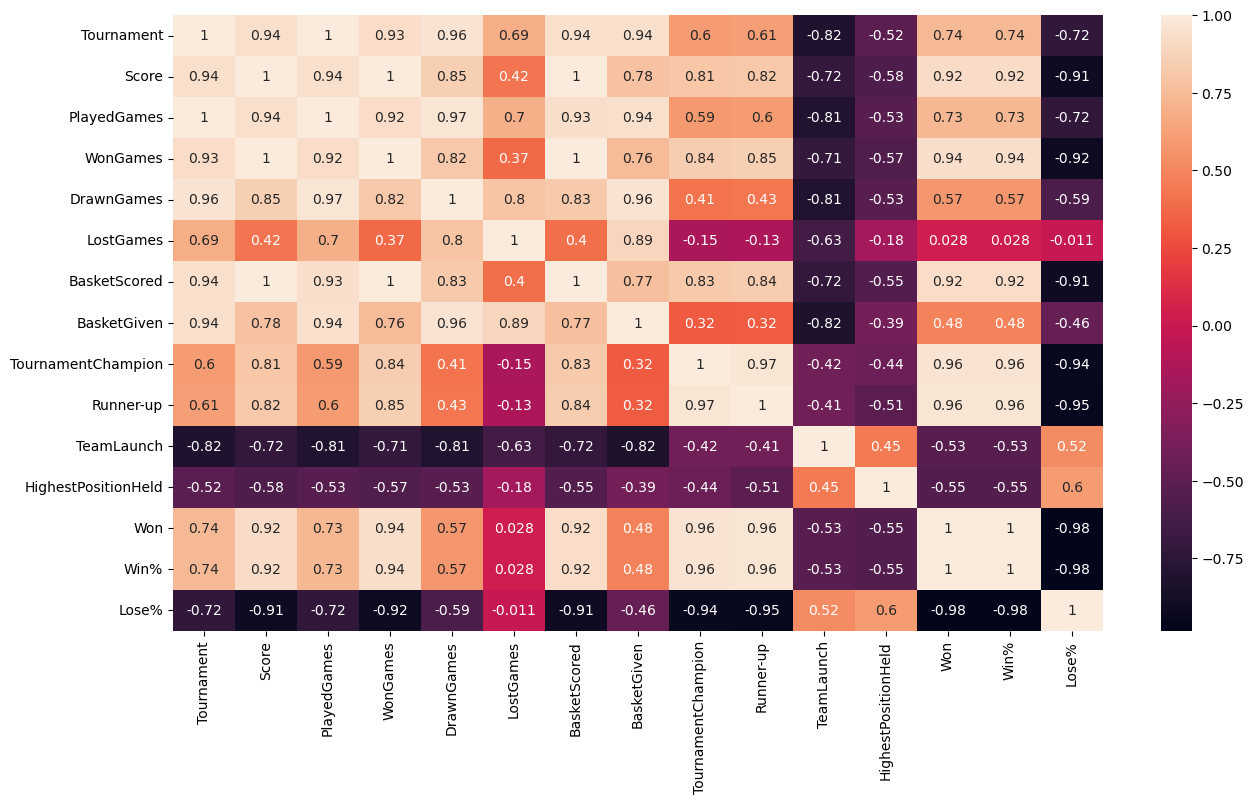

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(df_intersect.corr(),annot=True)

### Teams with highest baskets per match

In [35]:
df_intersect['baskets_per_match'] = df_intersect['BasketScored']/df_intersect['PlayedGames']
df_intersect['baskets_per_match']

0     2.153150
1     2.136133
2     1.734507
3     1.676684
4     1.650901
5     1.528239
6     1.374334
7     1.402259
8     1.350957
9     1.249421
10    1.341578
11    1.341176
12    1.377517
13    1.229015
14    1.196356
Name: baskets_per_match, dtype: float64

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='baskets_per_match'>

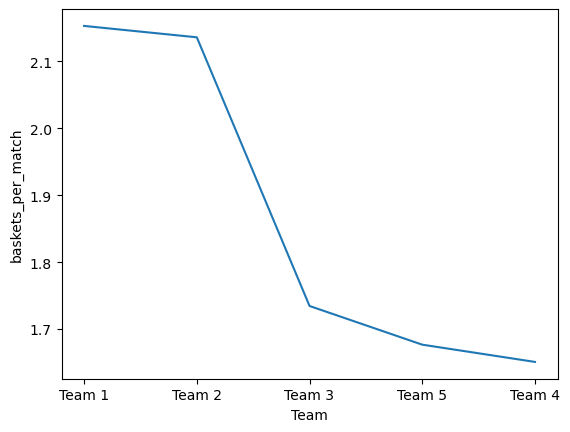

In [36]:
sns.lineplot(x='Team', y='baskets_per_match', data=df_intersect.head(5))

### Analysing the Probability of a Team wining the game

In [38]:
df_winnings= df.nlargest(20, ['WonGames'])
df_winnings['Win_Prob']= df_winnings['Win%']/100

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

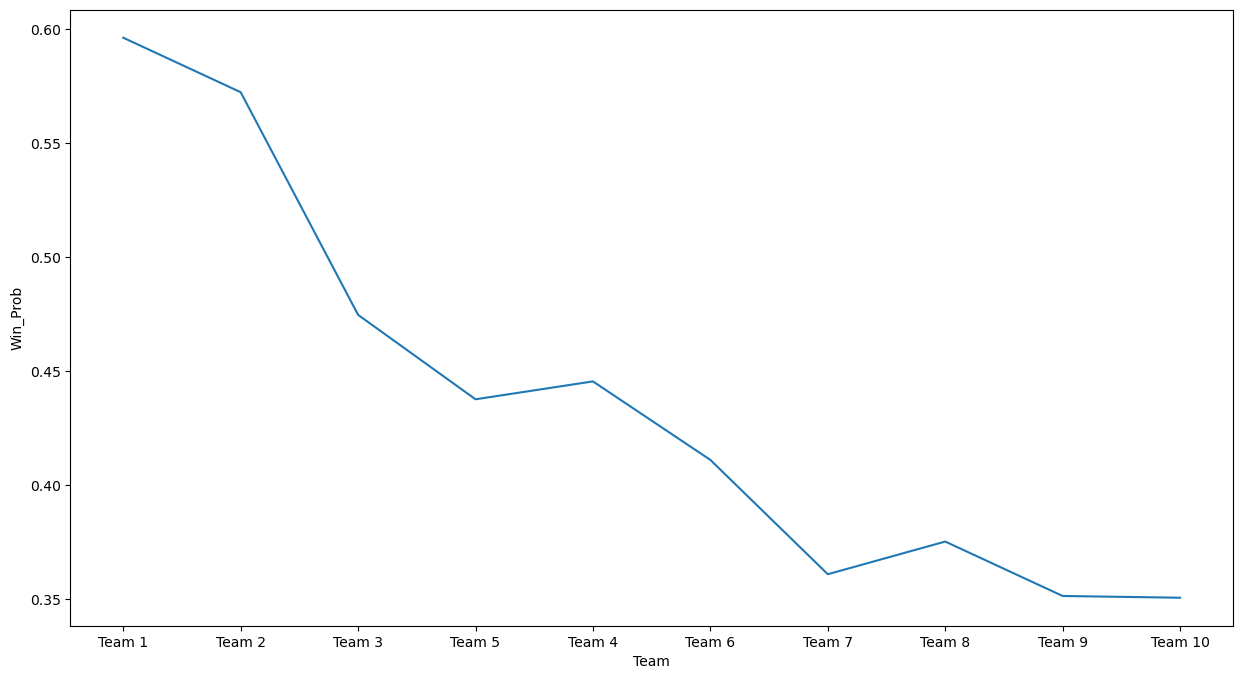

In [39]:
plt.figure(figsize=(15,8))
sns.lineplot( x='Team', y='Win_Prob',data=df_winnings.head(10))
plt.show()

In [44]:
df.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Won,Win%,Lose%
0,Team 1,86,4385.0,2762.0,1647.0,552.0,563.0,5947.0,3140.0,33.0,23.0,1929,1,59.630702,59.630702,20.383780
1,Team 2,86,4262.0,2762.0,1581.0,573.0,608.0,5900.0,3114.0,25.0,25.0,1929,1,57.241130,57.241130,22.013034


In [46]:
df['TeamLaunch'].unique()

array(['1929', '1931', '1934', '1939', '1932', '1941', '1948', '1944',
       '1935', '1949', '1933', '1960', '1951', '1998', '1977', '1959',
       '2004', '1961', '1940', '1930', '1963', '1974', '1943', '1987',
       '1991', '2007', '1962', '1994', '1978', '1971', '1999', '2014',
       '1990', '1947', '1996', '1995', '1945', '1953', '1979', '1950',
       '2016', '2009', '1956', '1955', '2017'], dtype=object)

In [48]:
df['TeamLaunch'].value_counts()

1929    10
1941     3
1963     2
1977     2
1935     2
1951     2
1939     2
2009     1
1996     1
1978     1
1971     1
1999     1
1955     1
2014     1
1990     1
1947     1
1995     1
2016     1
1945     1
1962     1
1953     1
1979     1
1950     1
1956     1
1994     1
1943     1
2007     1
1998     1
1934     1
1932     1
1948     1
1944     1
1949     1
1933     1
1960     1
1959     1
1991     1
2004     1
1961     1
1940     1
1930     1
1974     1
1931     1
1987     1
2017     1
Name: TeamLaunch, dtype: int64

In [ ]:
-year and team launch

<IPython.core.display.Javascript object>

<Axes: xlabel='TeamLaunch', ylabel='Team'>

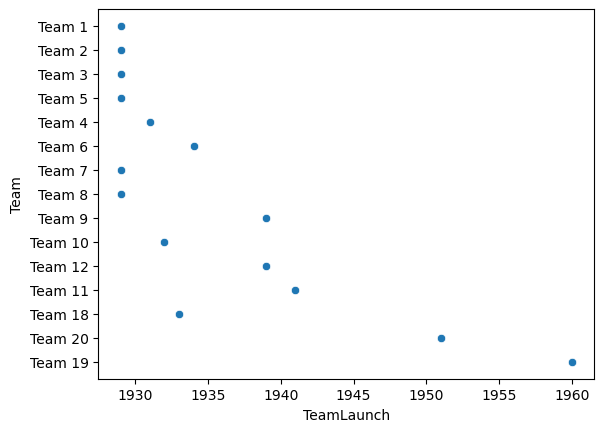

In [47]:
sns.scatterplot(data=df_intersect,x='TeamLaunch',y='Team')

Most of the teams were formed in the year 1929. This graph shows highest winning teams which were launched between 1929 to 1960's.

In [40]:
df_intersect[['Team', 'Win%', 'WonGames']]

,Team,Win%,WonGames
0,Team 1,59.630702,1647.0
1,Team 2,57.241130,1581.0
2,Team 3,47.475134,1241.0
3,Team 5,43.772629,1209.0
4,Team 4,44.557057,1187.0
5,Team 6,41.112957,990.0
6,Team 7,36.100533,948.0
7,Team 8,37.532580,864.0
8,Team 9,35.146022,698.0
9,Team 10,35.069444,606.0


### we can conclude that the Company management can approach any of the top 5 teams which will be a deal win for them.

#### 3.  Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity,veracity etc. on the data points collected by the association to perform a better data analysis in future.Submit a 200-500 words report to the management.

In light of the extensive data points that have been collected for the basketball dataset, few recommendations for improving the quality, quantity, variety, velocity, and veracity of the data. These suggestions, when implemented, will lead to a more accurate and valuable data analysis in the future.

1. Quality: To improve the quality of data, it is essential to ensure that the data is accurate, consistent, and complete. Here are a few suggestions to achieve this:
   a) Standardizing Data: Ensure that the data is standardized and formatted consistently across all sources. This will make it easier to clean and analyze the data.

   b) Data Cleansing: Address any duplicates, errors, or missing values in the data. Use Python libraries like Pandas and Numpy to remove such issues.

   c) Data Validation: Develop validation mechanisms to check that the data being entered adheres to the specified format and is within acceptable ranges. This indicator would help prevent inconsistent and incomplete data from being entered.

2) Quantity: The basketball dataset is of significant size, but there are possibilities to grow its size through additional data sources. Here's what we recommend:

   a) Data Stitching: Combine the data from various sources to create a more comprehensive and valuable dataset. This provides us with extensive data analysis, thereby not allowing the data analysts to limit their research and analysis.


3) Variety: The variety of data is how comprehensive the data points are in terms of their characteristics. To improve variety and richness, it is necessary to factor in the following:

   a) Add non-Numeric Data: Consistently collecting qualitative data points like team strategy, behavior, conditions, locations, and other vital factors to further enrich the data.

   b) Time Series Data: Besides numerical and categorical data, obtain time-series data for each game, allowing detailed insights into trends over time.


4) Velocity: Data velocity is the speed at which data is flowing into the system. Here's what we suggest:

   a) Real-time Analytics: It would be best to upgrade our data analysis infrastructure to deliver near-real-time analysis during matches.

5) Veracity: Defining the veracity of data refers to how trustworthy and reliable it is—the confidence level attached to the data. This can be done by:

   a) Data Provenance: Ensure that data sources are credible, authentic, and have a confident pedigree.

   b) Data Governance: Provide data access controls to appropriate personnel and audit trails. Ensure data lineage and traceability.

By implementing these suggestions, we can significantly improve the NBA basketball dataset's overall quality, quantity, variety, velocity, and veracity. The mission ahead would result in a vastly superior data structure for analysis, insight, and recommendation-making.